# Trying to figure out how to plot hourly data using cartopy
Created by Eric S. Martinez  
July 12, 1999

### Loading Libraries

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

### Importing Data

In [2]:
path_name = '/Users/atoc_reu_student/Downloads/ERA5/Data/Hourly/'
file_name = 'era5_sl_hourly_Antarctic_snowfall_1999_nov_dec.nc'
full_ds = xr.open_mfdataset(path_name+file_name)
full_ds

<xarray.Dataset>
Dimensions:    (latitude: 721, longitude: 1440, time: 1464)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * time       (time) datetime64[ns] 1999-11-01 ... 1999-12-31T23:00:00
Data variables:
    sf         (time, latitude, longitude) float32 dask.array<chunksize=(1464, 721, 1440), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      2021-06-08 04:19:37 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

In [3]:
sf = full_ds.sf
snowfall = sf.sel(time=slice('1999-11-26', '1999-12-16'), latitude=slice(-60, -90), longitude=slice(239.5,269.5))
mean_snowfall = sf.sel(time=slice('1999-11-26', '1999-12-16'), latitude=slice(-60, -90), longitude=slice(239.5,269.5)).mean(dim='time')
snowfall = sum(snowfall)

# Converting variables to millimeters
mean_snowfall = mean_snowfall*(10**3)
snowfall = snowfall*(10**3)


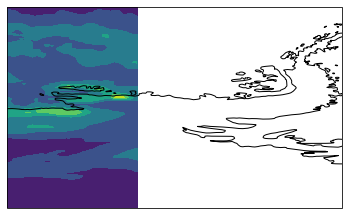

In [4]:
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180)) # you can change the central longitude of the map
ax.coastlines()

ax.contourf(snowfall.longitude,snowfall.latitude,snowfall,transform=ccrs.PlateCarree())

ax.set_extent([250, 300, -60, -90]) # solution


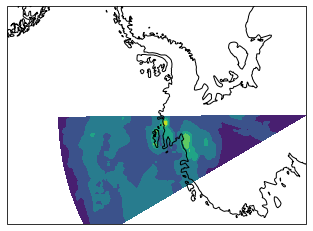

In [5]:
ax = plt.axes(projection=ccrs.Orthographic(central_latitude=-90))
ax.coastlines()
ax.contourf(snowfall.longitude, snowfall.latitude, snowfall, transform=ccrs.PlateCarree())
ax.set_extent([250, 290, -50, -90])


### Plot

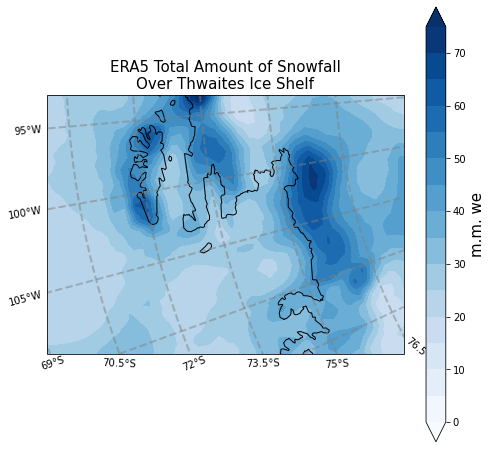

In [80]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,8), subplot_kw=dict(projection=ccrs.Orthographic(central_latitude=-90)))
ax.coastlines()
ax.add_feature(cfeature.LAND,color='k')

im = ax.contourf(snowfall.longitude, snowfall.latitude, snowfall, 
                 transform = ccrs.PlateCarree(), 
                 cmap = 'Blues',
                 levels = np.arange(0,80,5),
                 extend = 'both')
# (239.5,269.5) longitude
# (-60, -90) latitude
ax.set_extent([250.5, 265.5, -70, -77.3])
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False


cbar = f.colorbar(im)
cbar.set_label('m.m. we', fontsize = 15)
ax.set_title('ERA5 Total Amount of Snowfall\n' + 'Over Thwaites Ice Shelf', fontsize = 15)
f.savefig("/Users/atoc_reu_student/Downloads/ERA5/Figures/Hourly/era5_map_total_snowfall_nov16_dec16.jpg", dpi = 100)


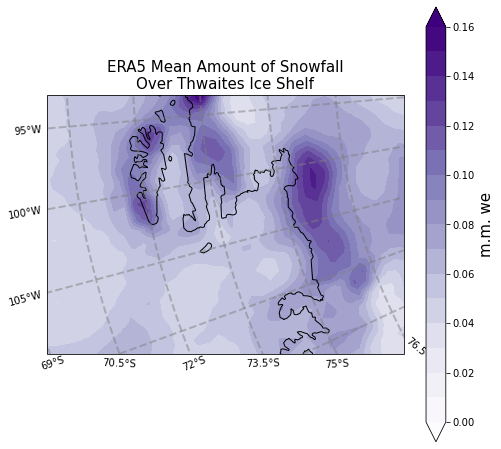

In [84]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,8), subplot_kw=dict(projection=ccrs.Orthographic(central_latitude=-90)))
ax.coastlines()
ax.add_feature(cfeature.LAND,color='k')

im = ax.contourf(mean_snowfall.longitude, mean_snowfall.latitude, mean_snowfall, transform = ccrs.PlateCarree(),
                cmap = 'Purples',
                 levels = np.arange(0,0.17,0.01),
                 extend = 'both')
# (239.5,269.5) longitude
# (-60, -90) latitude
ax.set_extent([250.5, 265.5, -70, -77.3])
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False


cbar = f.colorbar(im)
cbar.set_label('m.m. we', fontsize = 15)
ax.set_title('ERA5 Mean Amount of Snowfall\n' + 'Over Thwaites Ice Shelf', fontsize = 15)
f.savefig("/Users/atoc_reu_student/Downloads/ERA5/Figures/Hourly/era5_map_mean_snowfall_nov16_dec16.jpg", dpi = 100)